In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn import cross_validation
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error

/Users/kejiawu/anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


/Users/kejiawu/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/kejiawu/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/kejiawu/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/kejiawu/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

[ 0.86470004  0.68212275  0.59449843  0.90015911  0.89166311]
Accuracy: 0.79 (+/- 0.06)
[[ 1088.18016736   -19.58803428   246.44717394   248.15011025
   -262.09960222  -482.97985225    94.66293417   -52.94445595
    555.24034019  -460.48643888]]
Training MSE: 2771936.248
Test MSE: 467555.426


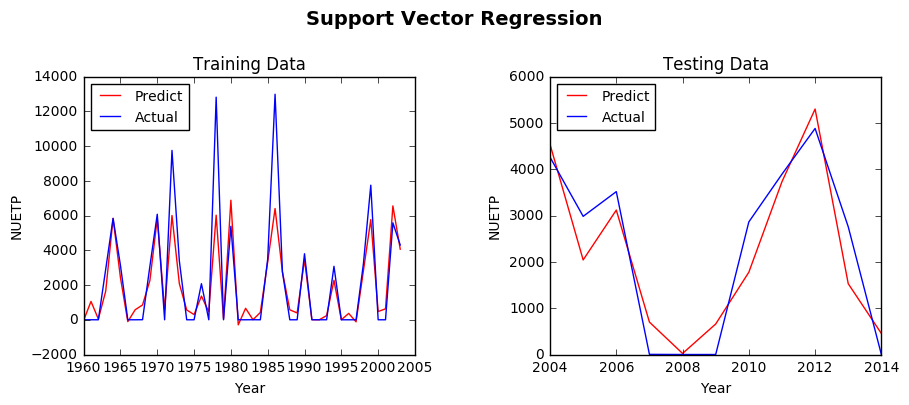

In [2]:
# Read data
data = pd.read_csv("../../Clean-Energy-Outlook/Data/data of states/CA.csv")
year1 = data[['Year']][:44]
year2 = data[['Year']][44:55]

# Data Preprocessing
data['GDP_scaled']=preprocessing.scale(data['GDP'])
data['CLPRB_scaled']=preprocessing.scale(data['CLPRB'])
data['EMFDB_scaled']=preprocessing.scale(data['EMFDB'])
data['ENPRP_scaled']=preprocessing.scale(data['ENPRP'])
data['NGMPB_scaled']=preprocessing.scale(data['NGMPB'])
data['PAPRB_scaled']=preprocessing.scale(data['PAPRB'])
data['PCP_scaled']=preprocessing.scale(data['PCP'])
data['ZNDX_scaled']=preprocessing.scale(data['ZNDX'])
data['OP_scaled']=preprocessing.scale(data['Nominal Price'])
data['OP2_scaled']=preprocessing.scale(data['Inflation Adjusted Price'])

# Split data for train and test
all_x = data[['GDP_scaled','CLPRB_scaled','EMFDB_scaled','ENPRP_scaled','NGMPB_scaled','PAPRB_scaled','PCP_scaled','ZNDX_scaled','OP_scaled', 'OP2_scaled']][:55]
all_y = data[['NUETP']][:55]
X_train, X_test, y_train, y_test = cross_validation.train_test_split(all_x, all_y, test_size=0.2, random_state=0)

# SVR for nuclear in CA with cross-validation
clf = SVR(kernel='linear', C=60.0, epsilon=0.3)
model = clf.fit(X_train, y_train)
scores = cross_validation.cross_val_score(clf, X_train, y_train, cv=5)

print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() / 2))
print(clf.coef_)

train_error = mean_squared_error(y_train, clf.predict(X_train))
print('Training MSE: %.3f' % train_error)
test_error = mean_squared_error(y_test, clf.predict(X_test))
print('Test MSE: %.3f' % test_error)

# Plots
fig = plt.figure(figsize=(10,4.5))
fig.suptitle('Support Vector Regression', fontsize=14, fontweight='bold')

# Plot for training data
fig.add_subplot(121)
plt.plot(year1, clf.predict(X_train), color='red', label='Predict')
plt.plot(year1, y_train, label='Actual')
plt.legend(loc=2,fontsize=10)
plt.title('Training Data')
plt.xlabel('Year')
plt.ylabel('NUETP')

# Plot for test data
fig.add_subplot(122)
plt.plot(year2, clf.predict(X_test), color='red', label='Predict')
plt.plot(year2, y_test, label='Actual')
plt.legend(loc=2,fontsize=10)
plt.title('Testing Data')
plt.xlabel('Year')
plt.ylabel('NUETP')

plt.tight_layout(pad=4, w_pad=4)
plt.show()

In [3]:
# predict Solar for future
year3 = data[['Year']][-6:]
year3 = year3.set_index([[0, 1, 2, 3, 4, 5]])
future_x = data[['GDP_scaled','CLPRB_scaled','EMFDB_scaled','ENPRP_scaled','NGMPB_scaled','PAPRB_scaled','PCP_scaled','ZNDX_scaled','OP_scaled','OP2_scaled']][-6:]
pred = pd.DataFrame(clf.predict(future_x))
pred.columns = ['NUETP']
future = pd.concat([year3, pred], axis=1)
print(future)

     Year        NUETP
0  2015.0  5685.897575
1  2016.0  5933.807980
2  2017.0  6020.606708
3  2018.0  6167.819582
4  2019.0  6312.639561
5  2020.0  6463.488140


In [4]:
statelist=["AK","AL","AR","AZ","CA","CO","CT","DE","FL","GA","IA","ID","IL","IN","KS","KY","LA","MA","MD","ME","MI","MN","MO","MS","MT","NC","ND","NE","NH","NJ","NM","NV","NY","OH","OK","OR","PA","RI","SC","SD","TN","TX","UT","VA","VT","WA","WI","WV","WY"]
result = year3

for i in range(49):
    data = pd.read_csv('../../Clean-Energy-Outlook/Data/data of states/%s.csv' % (statelist[i]))
    
    year1 = data[['Year']][:44]
    year2 = data[['Year']][44:55]

    # Data Preprocessing
    data['GDP_scaled']=preprocessing.scale(data['GDP'])
    data['CLPRB_scaled']=preprocessing.scale(data['CLPRB'])
    data['EMFDB_scaled']=preprocessing.scale(data['EMFDB'])
    data['ENPRP_scaled']=preprocessing.scale(data['ENPRP'])
    data['NGMPB_scaled']=preprocessing.scale(data['NGMPB'])
    data['PAPRB_scaled']=preprocessing.scale(data['PAPRB'])
    data['PCP_scaled']=preprocessing.scale(data['PCP'])
    data['ZNDX_scaled']=preprocessing.scale(data['ZNDX'])
    data['OP_scaled']=preprocessing.scale(data['Nominal Price'])
    data['OP2_scaled']=preprocessing.scale(data['Inflation Adjusted Price'])

    # Split data for train and test
    all_x = data[['GDP_scaled','CLPRB_scaled','EMFDB_scaled','ENPRP_scaled','NGMPB_scaled','PAPRB_scaled','PCP_scaled','ZNDX_scaled','OP_scaled', 'OP2_scaled']][:55]
    all_y = data[['NUETP']][:55]
    X_train, X_test, y_train, y_test = cross_validation.train_test_split(all_x, all_y, test_size=0.2, random_state=0)

    # SVR for hydro in AK with cross-validation
    clf = SVR(kernel='linear', C=40.0, epsilon=0.3)
    model = clf.fit(X_train, y_train)
    scores = cross_validation.cross_val_score(clf, X_train, y_train, cv=5)

    print(scores)
    print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() / 2))
    print(clf.coef_)

    future_x = data[['GDP_scaled','CLPRB_scaled','EMFDB_scaled','ENPRP_scaled','NGMPB_scaled','PAPRB_scaled','PCP_scaled','ZNDX_scaled','OP_scaled','OP2_scaled']][-6:]
    pred = pd.DataFrame(clf.predict(future_x))
    pred.columns = [statelist[i]]
    result = pd.concat([result, pred], axis=1)

print(result)

# output to csv
result.to_csv('Nuclear_Pred_SVR.csv', encoding='utf-8', index=False)

[ 0.86039305  0.47665537 -0.08091408  0.         -0.2953379 ]
Accuracy: 0.19 (+/- 0.21)
[[-2.55823723  0.90549747  0.          0.         -0.51510408 -0.6683988
  -0.12771164  0.          7.80490526 -1.71060131]]
[ 1.  1.  1.  1.  1.]
Accuracy: 1.00 (+/- 0.00)
[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]


/Users/kejiawu/anaconda/lib/python3.5/site-packages/sklearn/preprocessing/data.py:177: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
/Users/kejiawu/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/kejiawu/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/kejiawu/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array 

[ 1.  1.  1.  1.  1.]
Accuracy: 1.00 (+/- 0.00)
[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]
[-26.65377125   0.71089577   0.65536252   0.           0.84893525]
Accuracy: -4.89 (+/- 5.44)
[[ -1.13350558e+00  -2.19482358e-01   1.13878970e+02   1.13371437e+02
   -8.28819825e-02  -3.09367265e-03  -1.15953256e-01   3.74066406e-02
    2.99013981e+00  -1.01071359e+00]]
[ 0.81151459  0.59766138  0.46035048  0.75021477  0.79992934]
Accuracy: 0.68 (+/- 0.07)
[[ 829.1396872    -5.56992042  239.09680399  240.18359288 -259.25278208
  -430.21622801   63.49794757    6.95226859  404.60474184 -356.11455759]]
[ 0.71959441  0.50477248  0.20269494 -7.91356169  0.58179035]
Accuracy: -1.18 (+/- 1.69)
[[ 172.8297149  -247.88057423  356.41012165  348.85110754  306.16252597
    10.45394688  -27.70011519   14.68931021  319.86544243  -16.7250931 ]]


/Users/kejiawu/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/kejiawu/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/kejiawu/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/kejiawu/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

[ 1.  1.  1.  1.  1.]
Accuracy: 1.00 (+/- 0.00)
[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]
[ 0.          0.8289771   0.4316526   0.          0.61096916]
Accuracy: 0.37 (+/- 0.17)
[[-0.83930302  0.          0.          0.          0.          0.
   0.2131462  -0.23841783  2.40049305 -0.80005986]]
[ 1.  1.  1.  1.  1.]
Accuracy: 1.00 (+/- 0.00)
[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]
[ 1.  1.  1.  1.  1.]
Accuracy: 1.00 (+/- 0.00)
[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]


/Users/kejiawu/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/kejiawu/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/kejiawu/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/kejiawu/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

[ 0.29601922  0.00916664 -0.15921433 -2.75256526  0.12349237]
Accuracy: -0.50 (+/- 0.57)
[[ 335.17420535  118.01147378  153.71929416  148.57420037    0.            0.
    35.27299205   47.98741318  471.30163641   16.13573948]]
[ 0.47495755  0.10690455 -0.12634099  0.          0.35271771]
Accuracy: 0.16 (+/- 0.11)
[[ -33.9863491     0.          -14.87599587    2.77403083    0.            0.
    -4.40873273    4.15652005  145.4305717   -43.45917397]]
[ 0.54656894  0.08181515 -0.08865468  0.          0.44517368]
Accuracy: 0.20 (+/- 0.13)
[[  -7.82882901   13.62994211  198.30337955  217.43856306   53.25176773
    65.31991625   31.31989207   56.38841214  264.81397793   75.319058  ]]
[ 0.4476743  -0.02696717  0.07703229  0.          0.32568996]
Accuracy: 0.16 (+/- 0.09)
[[ -18.5656559   -36.67968786  122.72332818  116.73517143  253.22685499
   -16.35270371   -8.5609379    11.39924877  124.81365593  -32.05691403]]
[ 0.65201131  0.49567402  0.05060234 -0.44274956  0.68045345]
Accuracy: 0.29 (+

/Users/kejiawu/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/kejiawu/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/kejiawu/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/kejiawu/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

[-1.48712385  0.15679968 -0.1000459   0.          0.57464454]
Accuracy: -0.17 (+/- 0.35)
[[ -7.97254369   0.           0.           0.           0.           0.
    4.15348596  -4.08419388  20.08144671  -6.88670026]]
[ 0.         -0.08752678 -0.26776907  0.         -0.10377617]
Accuracy: -0.09 (+/- 0.05)
[[-1.03992072 -0.23162283  0.          0.         -0.17111349  0.
  -0.12430547  0.11719868  2.90263988 -1.10466823]]
[ 0.3372781   0.10221357  0.04960958  0.          0.20550306]
Accuracy: 0.14 (+/- 0.06)
[[ -37.66936282    0.            0.            0.            0.            0.
    11.84485511   -8.34104937  107.86566943  -36.08416922]]
[ 0.97553674  0.59578491  0.06790083  0.          0.54630956]
Accuracy: 0.44 (+/- 0.18)
[[  6.90220175e+00   0.00000000e+00   1.18926803e+02   1.20253346e+02
   -7.76507102e+00  -1.80143287e+00  -5.99494499e-02  -3.05710979e-01
    1.55460279e+01  -2.01450641e+00]]
[ 0.45114134  0.2569106   0.02590086 -2.4756942   0.34155969]
Accuracy: -0.28 (+/- 0

/Users/kejiawu/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/kejiawu/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/kejiawu/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/kejiawu/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

[ 0.73111214  0.26521509  0.47362681  0.          0.60071419]
Accuracy: 0.41 (+/- 0.13)
[[ -29.95804719    3.62398308  171.83077684  167.49356869    4.19198471
   -17.03002808   -0.87214732    2.29812427  148.19016227  -35.86616151]]
[ 1.  1.  1.  1.  1.]
Accuracy: 1.00 (+/- 0.00)
[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]
[ 0.72815546  0.71186461  0.46803032  0.          0.74357342]
Accuracy: 0.53 (+/- 0.14)
[[ 127.1431019   -91.14865195   -5.07870186   -4.15683797    9.13454973
    -3.59485718   13.60800175   -5.62253019  163.67854581   -1.42611177]]
[ 1.  1.  1.  1.  1.]
Accuracy: 1.00 (+/- 0.00)
[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]
[ 0.59584289  0.34606583  0.23489385  0.          0.56915488]
Accuracy: 0.35 (+/- 0.11)
[[ 351.6529329  -214.97556076   74.21959773   70.00030953  -63.70202158
   282.84932421   -4.21774248   26.60117659  316.02176892  -41.07092147]]
[   0.96607217    0.52586677    0.27316541 -203.0388408     0.64915194]
Accuracy: -40.12 (+/- 40.73)
[[ -44.696035

/Users/kejiawu/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/kejiawu/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/kejiawu/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/kejiawu/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

[[-17.15459243   0.           0.           0.           0.           0.
    3.28860956  -3.14671413  46.27334252 -16.30263163]]
[ 0.27866837  0.87823526  0.70116696  0.          0.57490769]
Accuracy: 0.49 (+/- 0.16)
[[-2.69815801  0.          0.          0.          0.          0.
   0.3605641  -0.3279726   7.81751694 -2.63670916]]
[ 0.93326659  0.90582092  0.87711204  0.          0.97200988]
Accuracy: 0.74 (+/- 0.19)
[[ 229.01913073 -256.38505427  126.2917122   152.93374062   68.10133457
    59.75756729  -27.21616676  -35.11340456  301.03338598   24.5584581 ]]
[ 0.         -0.10715926 -0.27557745  0.          0.        ]
Accuracy: -0.08 (+/- 0.05)
[[-0.56938098  0.          0.          0.          0.07036015 -0.12732099
   0.27987474 -0.3400675   0.89796533 -0.37952971]]
[  0.65084326   0.20395203   0.02763337 -26.76003826   0.43852978]
Accuracy: -5.09 (+/- 5.42)
[[  66.80774112    0.          234.6973812   237.97711865   -9.60734617
    80.15618605   27.83829714   -0.75040704  195.82

/Users/kejiawu/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/kejiawu/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/kejiawu/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/kejiawu/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

[[ -2.88584763   1.12863762   0.21552621   0.10528318  -0.81682662
   -1.0169608   -0.52647876   0.65936479  13.04242753  -3.49109671]]
[ 0.70992213  0.29773974  0.04599361  0.          0.58292862]
Accuracy: 0.33 (+/- 0.14)
[[ 221.26801632 -266.37334475    0.            0.          -78.78244705
    17.95471809  -50.60990036  -15.27596988  401.85982287  213.16179922]]
[ 0.91303793  0.49674177  0.42741119 -0.69241353  0.72155048]
Accuracy: 0.37 (+/- 0.28)
[[ 150.15448578    0.          417.87511661  419.8481133   -58.11131505
     0.          -30.80575398   -8.76796599  204.75305729  -81.28879998]]
[  0.48162789   0.29557138   0.07604214 -37.99851631   0.52846047]
Accuracy: -7.32 (+/- 7.67)
[[  82.47935856   36.05594044    0.            0.            3.00685816
    51.57838153    8.4209828    14.71620447  222.31840476  -46.78540622]]
[ 0.          0.48426968  0.09335203  0.          0.59124122]
Accuracy: 0.23 (+/- 0.13)
[[-1.00639392  0.          0.          0.          0.          0.
  

/Users/kejiawu/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/kejiawu/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/kejiawu/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/kejiawu/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

[ 0.5963441   0.96667183  0.91047921 -4.79030649  0.77150281]
Accuracy: -0.31 (+/- 1.12)
[[ -6.84354366   0.26851578   7.02100097  -0.75984909  -3.04466334
   -2.44866036   1.88839201  -1.99318392  25.27072113  -5.56756448]]
[ 0.4956607   0.16327286 -0.09464262  0.28158802  0.19028881]
Accuracy: 0.21 (+/- 0.10)
[[ 643.21659951 -413.75562979  759.49083506  757.40425157  105.89816756
  -381.53307932    7.0415014   -31.47638443  586.98551701   28.0769805 ]]
[-1.1141136   0.46671222  0.45766581  0.          0.51877311]
Accuracy: 0.07 (+/- 0.31)
[[  30.08213917  -63.77604787    0.            0.           57.96407249
     2.91392667   -0.19772563   -0.90370232  110.3791226   -24.01536946]]
[ 1.  1.  1.  1.  1.]
Accuracy: 1.00 (+/- 0.00)
[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]
[-0.42489765  0.24906145 -0.14031333 -0.83426433  0.55247855]
Accuracy: -0.12 (+/- 0.24)
[[ -4.23225406   0.           0.           0.           0.           0.
    1.50258996  -1.48357093  15.26972695  -5.36352293]

/Users/kejiawu/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/kejiawu/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/kejiawu/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/kejiawu/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

[ 0.53723323  0.58758577  0.39906748 -5.94920729  0.67667211]
Accuracy: -0.75 (+/- 1.30)
[[ -22.34985419    0.          225.15918096  220.70980915    0.            0.
     3.01797732   -3.35728226  100.65331247  -31.16104216]]
[  7.47872998e-01   3.91984881e-01   4.02518046e-01  -8.28112280e+02
   6.52865588e-01]
Accuracy: -165.18 (+/- 165.73)
[[  88.2583776   -50.63904406    0.            0.           75.78516843
     2.84319461  -29.72270181   27.17146144  162.12985011  -16.96860796]]
[ 0.62092108  0.33359143  0.26790638  0.68221259  0.34182163]
Accuracy: 0.45 (+/- 0.08)
[[  46.89750016 -121.00941191  182.54727176  194.8212056   182.27723023
    74.0780683     3.61861066  -18.48009807  133.81044886  -35.81210401]]
     Year        AK   AL   AR          AZ           CA           CO   CT  \
0  2015.0  5.015171  0.0  0.0  478.045899  4774.735493  2537.905063  0.0   
1  2016.0  6.012591  0.0  0.0  556.350916  5028.771805  2903.385420  0.0   
2  2017.0  7.025468  0.0  0.0  645.588717  510

/Users/kejiawu/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/kejiawu/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/kejiawu/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/kejiawu/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan